<a href="https://colab.research.google.com/github/NiyazovIlia/PyTorch-1/blob/lesson-10/HW_PyTorch_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
import time
from torch.autograd import Variable

In [2]:
train_tfms = tt.Compose([tt.Grayscale(num_output_channels=1), # Картинки черно-белые
                         # Настройки для расширения датасета
                         tt.Resize((64,64)),
                         tt.RandomHorizontalFlip(),           # Случайные повороты на 90 градусов
                         tt.RandomRotation(30),               # Случайные повороты на 30 градусов
                         tt.ToTensor()])                      # Приведение к тензору

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vvWxyt61-txl1IFfBQ_w8zj9pGRYD5_b' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vvWxyt61-txl1IFfBQ_w8zj9pGRYD5_b" -O train10.zip && rm -rf /tmp/cookies.txt 

--2022-05-10 11:15:04--  https://docs.google.com/uc?export=download&confirm=t&id=1vvWxyt61-txl1IFfBQ_w8zj9pGRYD5_b
Resolving docs.google.com (docs.google.com)... 74.125.195.102, 74.125.195.100, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8pjbs7s0oi1lgnfrse6hvf4ojc562ja3/1652181300000/04950800049511525301/*/1vvWxyt61-txl1IFfBQ_w8zj9pGRYD5_b?e=download [following]
--2022-05-10 11:15:04--  https://doc-14-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8pjbs7s0oi1lgnfrse6hvf4ojc562ja3/1652181300000/04950800049511525301/*/1vvWxyt61-txl1IFfBQ_w8zj9pGRYD5_b?e=download
Resolving doc-14-c0-docs.googleusercontent.com (doc-14-c0-docs.googleusercontent.com)... 142.250.99.132, 2607:f8b0:400e:c0c::84
Connecting to doc-14-c0-docs.googleusercontent.com (doc-14-c0

In [4]:
!unzip train10.zip

Archive:  train10.zip
   creating: train10/
   creating: train10/c/
  inflating: train10/c/frame_00_09_0001.png  
  inflating: train10/c/frame_00_09_0002.png  
  inflating: train10/c/frame_00_09_0003.png  
  inflating: train10/c/frame_00_09_0004.png  
  inflating: train10/c/frame_00_09_0005.png  
  inflating: train10/c/frame_00_09_0006.png  
  inflating: train10/c/frame_00_09_0007.png  
  inflating: train10/c/frame_00_09_0008.png  
  inflating: train10/c/frame_00_09_0009.png  
  inflating: train10/c/frame_00_09_0010.png  
  inflating: train10/c/frame_00_09_0011.png  
  inflating: train10/c/frame_00_09_0012.png  
  inflating: train10/c/frame_00_09_0013.png  
  inflating: train10/c/frame_00_09_0014.png  
  inflating: train10/c/frame_00_09_0015.png  
  inflating: train10/c/frame_00_09_0016.png  
  inflating: train10/c/frame_00_09_0017.png  
  inflating: train10/c/frame_00_09_0018.png  
  inflating: train10/c/frame_00_09_0019.png  
  inflating: train10/c/frame_00_09_0020.png  
  inflating:

In [5]:
classes_train = os.listdir("../content/train10")
print(f'Train Classes - {classes_train}')

Train Classes - ['fist', 'down', 'palm_moved', 'index', 'c', 'fist_moved', 'palm', 'I', 'ok', 'thumb']


In [6]:
for emotion in os.listdir('../content/train10'):
    print(emotion, len(os.listdir(f'../content/train10/{emotion}')))

fist 100
down 100
palm_moved 100
index 100
c 100
fist_moved 100
palm 100
I 100
ok 100
thumb 100


In [7]:
def digit_to_classname(digit):
    if digit == 0:
        return 'fist'
    elif digit == 1:
        return 'down'
    elif digit == 2:
        return 'palm_moved'
    elif digit == 3:
        return 'index'
    elif digit == 4:
        return 'c'
    elif digit == 5:
        return 'fist_moved'
    elif digit == 6:
        return 'palm'
    elif digit == 7:
        return 'I'
    elif digit == 8:
        return 'ok'
    elif digit == 9:
        return 'thumb'

In [8]:
train_ds = ImageFolder('../content/train10/', train_tfms)

In [9]:
train_ds

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: ../content/train10/
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [10]:
batch_size = 256

In [11]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2)

torch.Size([1, 64, 64])
tensor(6) palm


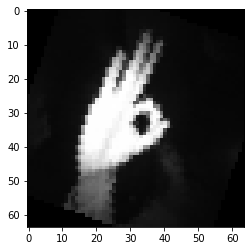

In [12]:
for img, l in train_dl:
    print(img[0].shape)
    print(l[0], digit_to_classname(l[0]))
    plt.imshow(img[0].permute(1, 2, 0)[:,:,0], cmap='gray')
    break

In [13]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        print(images[0].shape)
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

torch.Size([1, 64, 64])


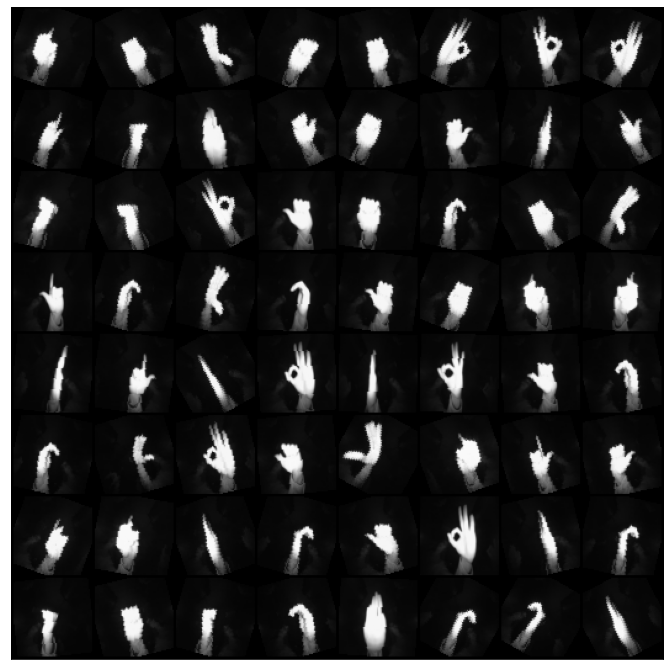

In [14]:
show_batch(train_dl)

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [16]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ELU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)


class ResNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 128)
        self.conv2 = conv_block(128, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        self.drop1 = nn.Dropout(0.5)
        
        self.conv3 = conv_block(128, 256)
        self.conv4 = conv_block(256, 256, pool=True)
        self.res2 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))
        self.drop2 = nn.Dropout(0.5)
        
        self.conv5 = conv_block(256, 512)
        self.conv6 = conv_block(512, 512, pool=True)
        self.res3 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.drop3 = nn.Dropout(0.5)
        
        self.classifier = nn.Sequential(nn.MaxPool2d(6), 
                                        nn.Flatten(),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.drop1(out)
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.drop2(out)
        
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res3(out) + out
        out = self.drop3(out)
        
        out = self.classifier(out)
        return out

In [17]:
model = ResNet(1, len(classes_train)).to(device)

In [18]:
epochs = 30
max_lr = 0.01
optimizer = torch.optim.Adam(model.parameters(), max_lr)

In [19]:
epoch_losses = []

for epoch in range(epochs):
    
    running_loss = 0.0
    epoch_loss = []
    for batch_idx, (data, labels) in enumerate(train_dl):
        data = data.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(data)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        epoch_loss.append(loss.item())
        
        
    print(f'Epoch {epoch+1}, loss: ', np.mean(epoch_loss),)
    epoch_losses.append(epoch_loss)

Epoch 1, loss:  17.83245539665222
Epoch 2, loss:  26.740893840789795
Epoch 3, loss:  18.562897205352783
Epoch 4, loss:  12.256502866744995
Epoch 5, loss:  9.736441373825073
Epoch 6, loss:  6.90023136138916
Epoch 7, loss:  5.89478063583374
Epoch 8, loss:  4.55898129940033
Epoch 9, loss:  3.5806602835655212
Epoch 10, loss:  2.7515329122543335
Epoch 11, loss:  2.060726046562195
Epoch 12, loss:  1.7672646343708038
Epoch 13, loss:  1.5578022003173828
Epoch 14, loss:  1.292995810508728
Epoch 15, loss:  1.1558944284915924
Epoch 16, loss:  1.0103508979082108
Epoch 17, loss:  0.9276101142168045
Epoch 18, loss:  0.808180034160614
Epoch 19, loss:  0.7378654778003693
Epoch 20, loss:  0.6774582415819168
Epoch 21, loss:  0.6063729226589203
Epoch 22, loss:  0.5571795403957367
Epoch 23, loss:  0.5149426534771919
Epoch 24, loss:  0.44416386634111404
Epoch 25, loss:  0.41039934754371643
Epoch 26, loss:  0.3996578976511955
Epoch 27, loss:  0.3681623637676239
Epoch 28, loss:  0.32927747815847397
Epoch 29,

In [20]:
torch.save(model, './train10.pth')

In [21]:
net = torch.load('./train10.pth')

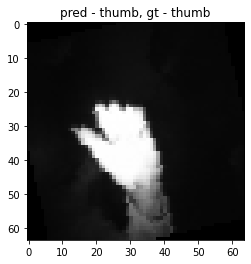

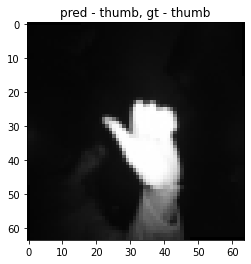

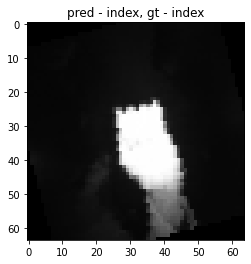

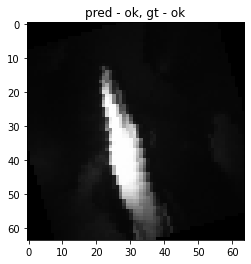

In [22]:
with torch.no_grad():
    for i, data in enumerate(train_dl, 3):
        images, labels = data[0].to(device), data[1].to(device)
        
        outputs = net(images)
        plt.title(f'pred - {digit_to_classname(outputs[0].argmax())}, gt - {digit_to_classname(labels[0])}')
        plt.imshow(images[0].cpu().squeeze(), cmap='gray')
        plt.show()
        if i>5:
            break